# Phân tích và Dự báo Chuỗi Thời Gian - Dữ liệu International Airline Passengers
## Bài tập SARIMA với khoảng dự báo

In [193]:
# Cài đặt các thư viện cần thiết
# !pip install pmdarima statsmodels matplotlib pandas

## 1. Đọc dữ liệu

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm



In [195]:
# Đọc file CSV (bạn hãy tải file từ Kaggle và để cùng thư mục với notebook này)
data = pd.read_csv(r'D:\time_seris_ktra\international-airline-passengers.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Month                                                                           145 non-null    object 
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [196]:
data['Month'] = pd.to_datetime(data['Month'], errors='coerce')
data.set_index('Month', inplace=True)
data.rename(columns={
    'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'Passengers'
}, inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [197]:
data.tail()

,Passengers
Month,
1960-09-01,508.0
1960-10-01,461.0
1960-11-01,390.0
1960-12-01,432.0
NaT,NaN


In [198]:
print(data.isna().sum())
# Xem các dòng có chứa ít nhất 1 NaN
nan_rows = data[data.isna().any(axis=1)]
print(nan_rows)
# Nếu muốn xem vị trí chỉ số (index) của các dòng có NaN
nan_indices = nan_rows.index.tolist()
print(nan_indices)
# Xem chi tiết từng ô NaN trong DataFrame
nan_positions = data.isna()
print(nan_positions)

Passengers    1
dtype: int64
       Passengers
Month            
NaT           NaN
[NaT]
            Passengers
Month                 
1949-01-01       False
1949-02-01       False
1949-03-01       False
1949-04-01       False
1949-05-01       False
...                ...
1960-09-01       False
1960-10-01       False
1960-11-01       False
1960-12-01       False
NaT               True

[145 rows x 1 columns]


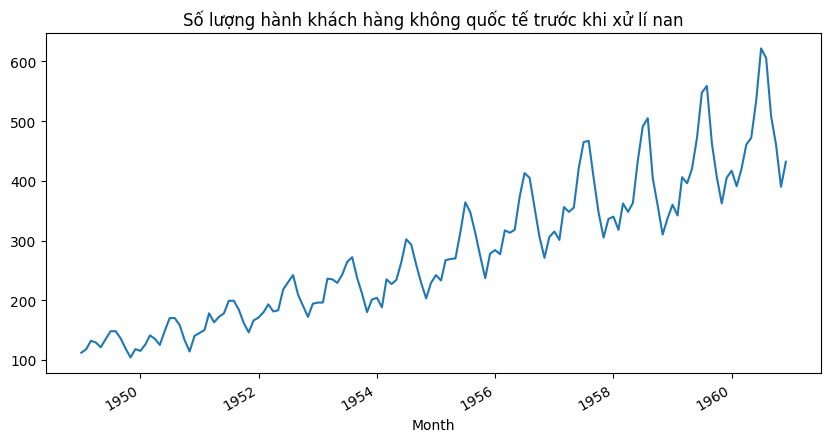

In [199]:
y = data['Passengers']
y.plot(figsize=(10,5), title='Số lượng hành khách hàng không quốc tế trước khi xử lí nan')
plt.show()

In [200]:
y_diff = y.dropna()  # Loại bỏ các dòng có NaN
print(y_diff.isna().sum())

0


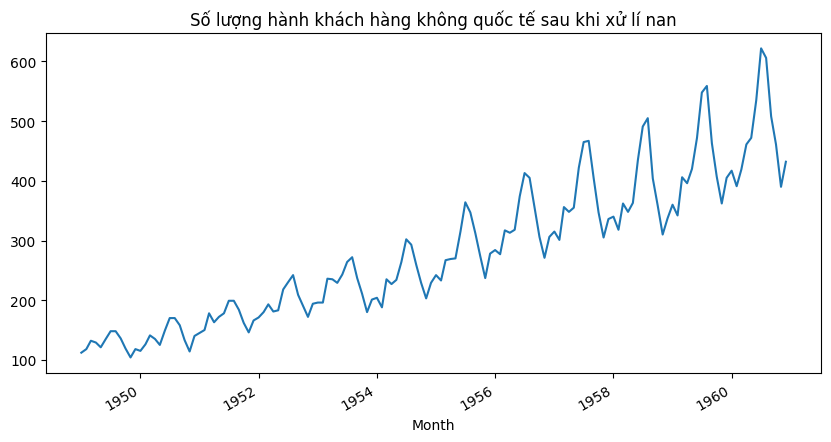

In [201]:
y_diff = data['Passengers']
y_diff.plot(figsize=(10,5), title='Số lượng hành khách hàng không quốc tế sau khi xử lí nan')
plt.show()

## 2. Kiểm tra tính dừng (Stationarity)

In [202]:
from statsmodels.tsa.stattools import adfuller

# Sai phân bậc 1
y_diff = y.diff().dropna()

# Kiểm định ADF sau khi sai phân
result_diff = adfuller(y_diff)

print(f'ADF Statistic (sau sai phân bậc 1): {result_diff[0]:.4f}')
print(f'p-value (sau sai phân bậc 1): {result_diff[1]:.4f}')

if result_diff[1] < 0.05:
    print('Chuỗi đã dừng sau khi sai phân bậc 1.')
else:
    print('Chuỗi vẫn chưa dừng, cần sai phân tiếp hoặc xử lý khác.')


ADF Statistic (sau sai phân bậc 1): -2.8293
p-value (sau sai phân bậc 1): 0.0542
Chuỗi vẫn chưa dừng, cần sai phân tiếp hoặc xử lý khác.


In [203]:
y_diff2 = y.diff().diff().dropna()

result_diff2 = adfuller(y_diff2)
print(f'ADF Statistic (sau sai phân bậc 2): {result_diff2[0]:.4f}')
print(f'p-value (sau sai phân bậc 2): {result_diff2[1]:.4f}')

if result_diff2[1] < 0.05:
    print('Chuỗi đã dừng sau sai phân bậc 2.')
else:
    print('Chuỗi vẫn chưa dừng, cần xử lý thêm.')


ADF Statistic (sau sai phân bậc 2): -16.3842
p-value (sau sai phân bậc 2): 0.0000
Chuỗi đã dừng sau sai phân bậc 2.


In [204]:
y_seasonal_diff = y.diff(12).dropna()

result_seasonal = adfuller(y_seasonal_diff)
print(f'ADF Statistic (sau sai phân mùa): {result_seasonal[0]:.4f}')
print(f'p-value (sau sai phân mùa): {result_seasonal[1]:.4f}')

if result_seasonal[1] < 0.05:
    print('Chuỗi đã dừng sau sai phân theo mùa.')
else:
    print('Chuỗi vẫn chưa dừng sau sai phân theo mùa.')


ADF Statistic (sau sai phân mùa): -3.3830
p-value (sau sai phân mùa): 0.0116
Chuỗi đã dừng sau sai phân theo mùa.


In [205]:
y_diff_combined = y.diff().diff(12).dropna()

result_combined = adfuller(y_diff_combined)
print(f'ADF Statistic (sau sai phân kết hợp): {result_combined[0]:.4f}')
print(f'p-value (sau sai phân kết hợp): {result_combined[1]:.4f}')

if result_combined[1] < 0.05:
    print('Chuỗi đã dừng sau sai phân kết hợp.')
else:
    print('Chuỗi vẫn chưa dừng, cần xử lý thêm.')


ADF Statistic (sau sai phân kết hợp): -15.5956
p-value (sau sai phân kết hợp): 0.0000
Chuỗi đã dừng sau sai phân kết hợp.


## 3. Tự động xác định mô hình SARIMA tối ưu

In [206]:
y.dropna(inplace=True)  # Loại bỏ các dòng có NaN sau khi xử lý
model_auto = pm.auto_arima(
    y,
    seasonal=True,
    m=12,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.23 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.59 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.22 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.76 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.08 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.13 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.64 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.34 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.90 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.07 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

## 4. Kiểm tra phần dư của mô hình

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


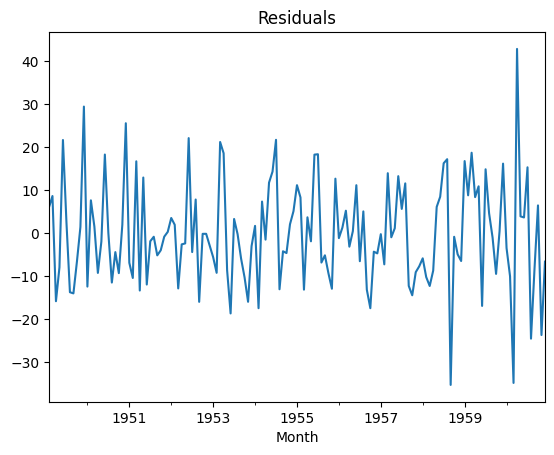

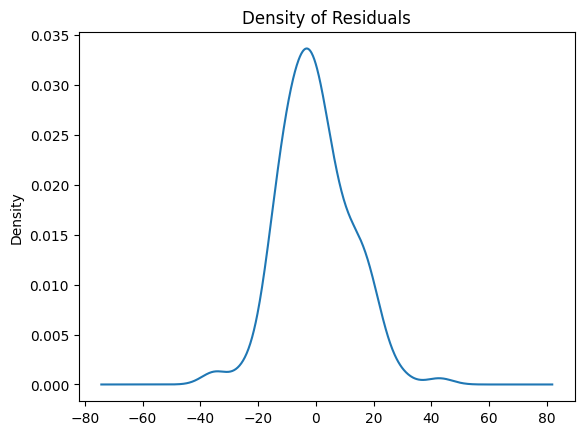

In [207]:
# Giả sử y_diff là chuỗi thời gian đã sai phân bậc 1

model = sm.tsa.statespace.SARIMAX(
    y_diff,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

residuals = pd.Series(results.resid)

residuals.plot(title='Residuals')
plt.show()

residuals.plot(kind='kde', title='Density of Residuals')
plt.show()

## 5. Dự báo 12 tháng tiếp theo kèm khoảng dự báo

Train: 100 điểm, Test: 28 điểm, Forecast (tương lai): 16 điểm


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE trên tập test: 25.344


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Dự báo tương lai  Lower CI 95%  Upper CI 95%
1959-10-01        415.961953    389.401673    442.522233
1959-11-01        368.318243    335.692679    400.943807
1959-12-01        395.101694    358.127496    432.075892
1960-01-01        417.167721    375.923642    458.411801
1960-02-01        398.784369    353.871986    443.696752
1960-03-01        461.616850    413.209502    510.024198
1960-04-01        451.332253    399.721425    502.943082
1960-05-01        474.742444    420.085957    529.398932
1960-06-01        528.001325    470.476170    585.526480
1960-07-01        602.656112    542.390048    662.922175
1960-08-01        613.792811    550.909887    676.675735
1960-09-01        517.862647    444.579030    591.146263
1960-10-01        470.678304    390.260246    551.096361
1960-11-01        422.978526    335.002719    510.954333
1960-12-01        449.793368    355.395112    544.191624
1961-01-01               NaN           NaN           NaN


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Dự báo mở rộng  Lower CI 95%  Upper CI 95%
1961-02-01      422.734098    394.771419    450.696778
1961-03-01      457.700895    424.797899    490.603890
1961-04-01      492.277505    455.270833    529.284177
1961-05-01      505.563366    464.826094    546.300637
1961-06-01      565.671782    521.526199    609.817365
1961-07-01      651.986404    604.675664    699.297144
1961-08-01      639.634242    589.357593    689.910892
1961-09-01      543.058845    489.981678    596.136012
1961-10-01      493.727026    437.989894    549.464157
1961-11-01      426.938001    368.662187    485.213815
1961-12-01      470.135609    409.427183    530.844034
1962-01-01             NaN           NaN           NaN


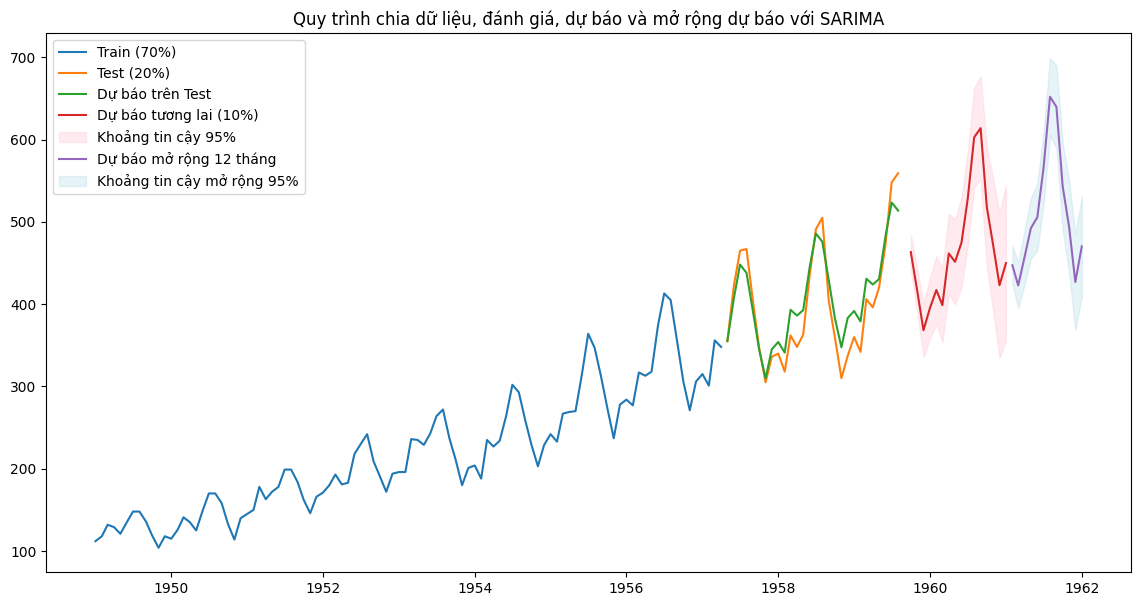

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Giả sử y là chuỗi thời gian (Pandas Series) có DatetimeIndex

# 1. Chia dữ liệu thành 3 phần
n = len(y)
n_train = int(n * 0.7)
n_test = int(n * 0.2)
n_forecast = n - n_train - n_test  # 10%

y_train = y.iloc[:n_train]
y_test = y.iloc[n_train:n_train + n_test]
y_future_true = y.iloc[n_train + n_test:]  # Nếu có dữ liệu thực tế tương lai để so sánh

print(f"Train: {n_train} điểm, Test: {n_test} điểm, Forecast (tương lai): {n_forecast} điểm")

# 2. Huấn luyện mô hình SARIMA trên tập train
model_train = sm.tsa.statespace.SARIMAX(
    y_train,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_train = model_train.fit()

# 3. Dự báo trên tập test
forecast_test_results = results_train.get_forecast(steps=n_test)
forecast_test = forecast_test_results.predicted_mean

# 4. Đánh giá RMSE trên test
rmse_test = np.sqrt(mean_squared_error(y_test, forecast_test))
print(f"RMSE trên tập test: {rmse_test:.3f}")

# 5. Huấn luyện lại mô hình trên train + test để dự báo tương lai
y_train_test = pd.concat([y_train, y_test])
model_all = sm.tsa.statespace.SARIMAX(
    y_train_test,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_all = model_all.fit()

# 6. Dự báo n_forecast tháng tương lai (tương lai đầu tiên)
forecast_future_results = results_all.get_forecast(steps=n_forecast)
forecast_future = forecast_future_results.predicted_mean
conf_int_future = forecast_future_results.conf_int()

# 7. Tạo index thời gian cho dự báo tương lai
index_future = pd.date_range(start=y.index[n_train + n_test] + pd.DateOffset(months=1), periods=n_forecast, freq='MS')

# 8. In bảng kết quả dự báo tương lai
forecast_future_df = pd.DataFrame({
    'Dự báo tương lai': forecast_future,
    'Lower CI 95%': conf_int_future.iloc[:, 0],
    'Upper CI 95%': conf_int_future.iloc[:, 1]
}, index=index_future)

print(forecast_future_df)

# --- Bắt đầu phần mở rộng dự báo thêm 12 tháng nữa ---

# 9. Chuẩn bị dữ liệu toàn bộ để huấn luyện lại (bao gồm forecast tương lai nếu không có dữ liệu thực tế)
if len(y_future_true) == n_forecast:
    y_all = pd.concat([y_train, y_test, y_future_true])
else:
    # Nếu không có dữ liệu thực tế tương lai, dùng dự báo tương lai thay thế
    y_all = pd.concat([y_train, y_test, forecast_future])

model_full = sm.tsa.statespace.SARIMAX(
    y_all,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_full = model_full.fit()

# 10. Dự báo thêm 12 tháng tiếp theo (mở rộng)
n_extra_forecast = 12
forecast_extra_results = results_full.get_forecast(steps=n_extra_forecast)
forecast_extra = forecast_extra_results.predicted_mean
conf_int_extra = forecast_extra_results.conf_int()

# 11. Tạo index thời gian cho dự báo mở rộng
start_extra = index_future[-1] + pd.DateOffset(months=1)
index_extra = pd.date_range(start=start_extra, periods=n_extra_forecast, freq='MS')

# 12. Tạo DataFrame dự báo mở rộng và in ra
forecast_extra_df = pd.DataFrame({
    'Dự báo mở rộng': forecast_extra,
    'Lower CI 95%': conf_int_extra.iloc[:, 0],
    'Upper CI 95%': conf_int_extra.iloc[:, 1]
}, index=index_extra)

print(forecast_extra_df)

# 13. Vẽ biểu đồ toàn bộ
plt.figure(figsize=(14,7))
plt.plot(y_train, label='Train (70%)')
plt.plot(y_test, label='Test (20%)')
plt.plot(forecast_test.index, forecast_test, label='Dự báo trên Test')
plt.plot(index_future, forecast_future, label='Dự báo tương lai (10%)')
plt.fill_between(index_future, conf_int_future.iloc[:, 0], conf_int_future.iloc[:, 1], color='pink', alpha=0.3, label='Khoảng tin cậy 95%')
plt.plot(index_extra, forecast_extra, label='Dự báo mở rộng 12 tháng')
plt.fill_between(index_extra, conf_int_extra.iloc[:, 0], conf_int_extra.iloc[:, 1], color='lightblue', alpha=0.3, label='Khoảng tin cậy mở rộng 95%')
plt.legend()
plt.title('Quy trình chia dữ liệu, đánh giá, dự báo và mở rộng dự báo với SARIMA')
plt.show()


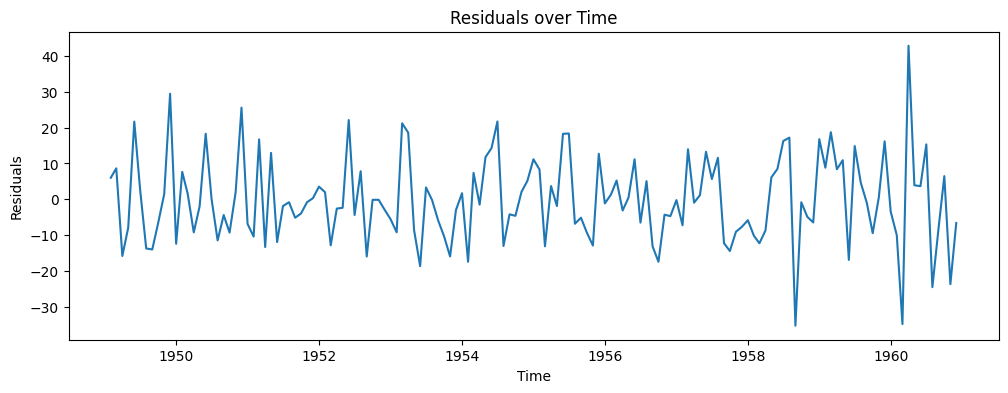

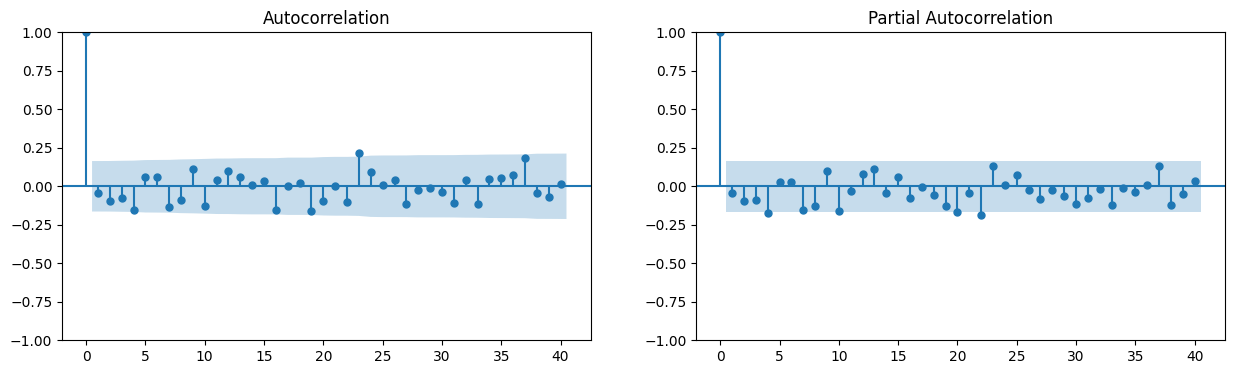

Ljung-Box test results:
      lb_stat  lb_pvalue
10  15.666832   0.109575
20  28.076184   0.107608
30  42.701611   0.062238


In [209]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Phần dư
residuals = results.resid

# 1. Vẽ phần dư theo thời gian
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('Residuals over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# 2. Vẽ ACF và PACF của phần dư
fig, axes = plt.subplots(1, 2, figsize=(15,4))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=axes[1])
plt.show()

# 3. Kiểm định Ljung-Box
lb_test = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print('Ljung-Box test results:')
print(lb_test)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


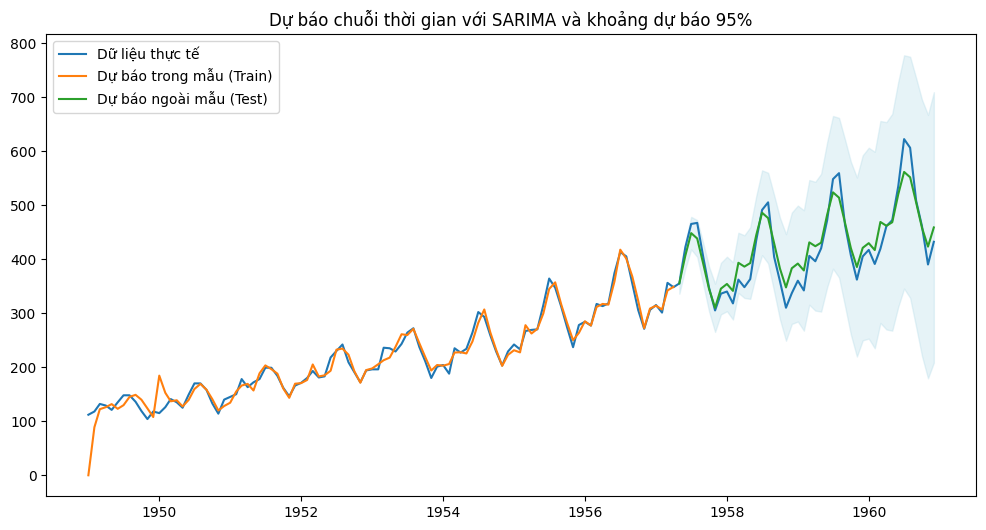

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load dữ liệu
data = sm.datasets.get_rdataset("AirPassengers").data

# Tách year và month từ số thập phân trong 'time'
data['year'] = data['time'].astype(int)
data['month'] = ((data['time'] - data['year']) * 12 + 1).round().astype(int)
data['Month'] = pd.to_datetime(dict(year=data['year'], month=data['month'], day=1))
data.set_index('Month', inplace=True)

y = data['value']

# Chia train-test
n = len(y)
n_train = int(n * 0.7)
train = y.iloc[:n_train]
test = y.iloc[n_train:]

# Xây dựng mô hình SARIMA
model = sm.tsa.statespace.SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit()

# Dự báo trong mẫu (in-sample) trên train với dynamic=False
in_sample_pred = results.get_prediction(start=train.index[0], end=train.index[-1], dynamic=False)
in_sample_mean = in_sample_pred.predicted_mean
in_sample_ci = in_sample_pred.conf_int()

# Dự báo ngoài mẫu (out-of-sample) tương ứng với test
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.plot(y, label='Dữ liệu thực tế')

# Dự báo trong mẫu (chỉ vẽ đường trung bình, không vẽ khoảng)
plt.plot(in_sample_mean.index, in_sample_mean, label='Dự báo trong mẫu (Train)')

# Dự báo ngoài mẫu
plt.plot(forecast_mean.index, forecast_mean, label='Dự báo ngoài mẫu (Test)')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='lightblue', alpha=0.3)

plt.title('Dự báo chuỗi thời gian với SARIMA và khoảng dự báo 95%')
plt.legend()
plt.show()
